In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# from collections import Counter
# from wordcloud import WordCloud

# from IPython.display import display, HTML

np.set_printoptions(suppress=True)

In [202]:
df_train = pd.read_csv('../../../../data/train.csv')
df_test = pd.read_csv('../../../../data/test.csv')

/tmp/ipykernel_345086/3946945178.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../../../../data/train.csv')


In [205]:
concat = pd.concat([df_train, df_test])

In [206]:
basic_columns = ['target', 'is_test'] 
numerical_columns = ['전용면적', '계약년월', '계약일', '층', '건축년도']
categorical_columns = ['시군구', '번지', '본번', '부번', '아파트명', '도로명']
selection_columns = basic_columns + numerical_columns + categorical_columns

existing_cols = [col for col in selection_columns if col in concat.columns]

concat = concat[existing_cols]

In [207]:
concat.columns

Index(['target', '계약년월', '계약일', '층', '건축년도', '시군구', '번지', '본번', '부번', '아파트명',
       '도로명'],
      dtype='object')

In [208]:
concat['계약년'] = concat['계약년월'].astype('str').map(lambda x : x[:4])
concat['계약월'] = concat['계약년월'].astype('str').map(lambda x : x[4:])

In [209]:
concat['계약월'] = concat['계약월'].astype(int)

In [210]:
concat_counter = (
    concat.groupby(['계약년', '계약월'])
          .size()
          .reset_index(name='월별거래건수')
)
concat = concat.merge(concat_counter, on=['계약년', '계약월'], how='left')

In [211]:
concat.columns

Index(['target', '계약년월', '계약일', '층', '건축년도', '시군구', '번지', '본번', '부번', '아파트명',
       '도로명', '계약년', '계약월', '월별거래건수'],
      dtype='object')

In [212]:
concat['계약년월시각화'] = concat['계약년'].astype(str) + '-' + concat['계약월'].astype(str).str.zfill(2)

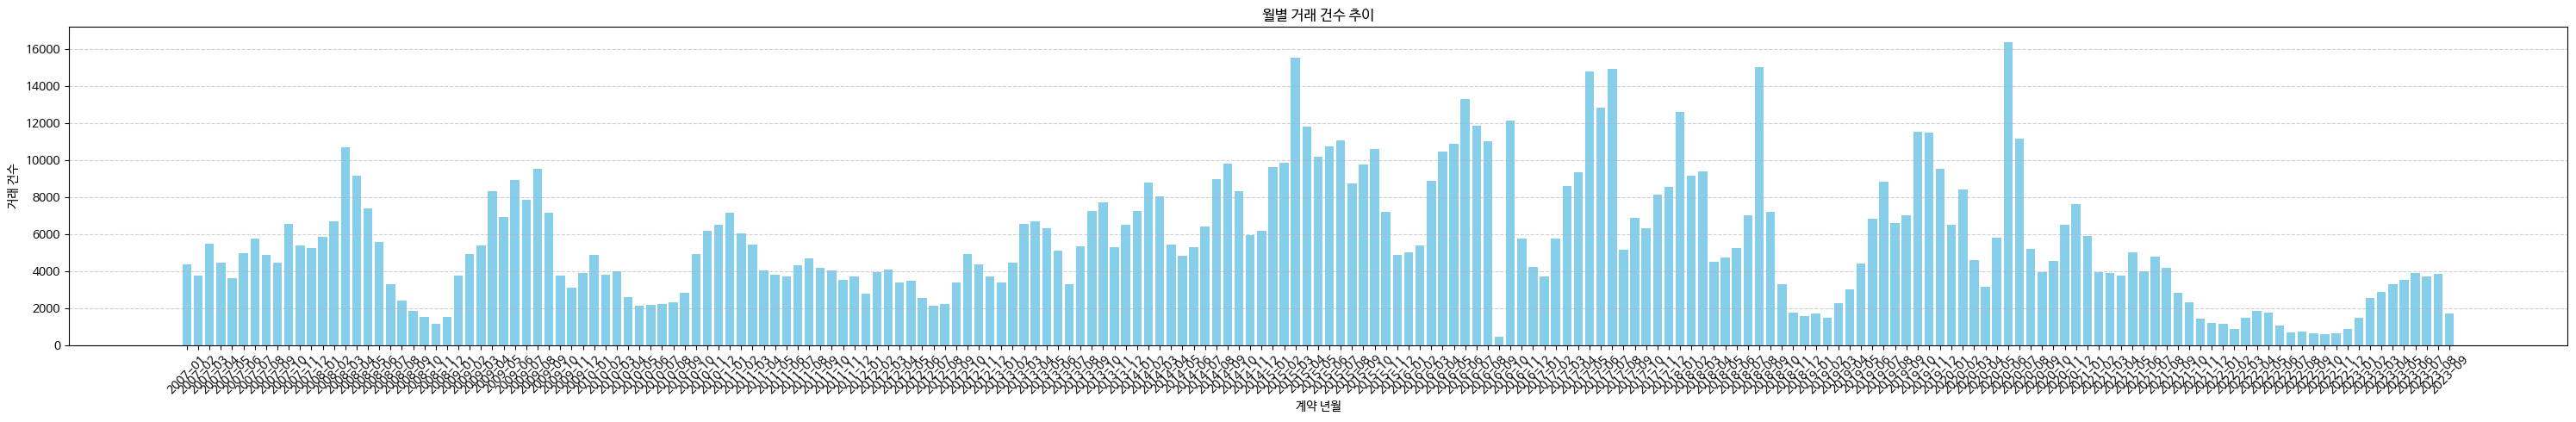

In [213]:
monthly_plot = (
    concat[['계약년월시각화', '월별거래건수']]
    .drop_duplicates()
    .sort_values('계약년월시각화')
)

plt.figure(figsize=(30, 5))
plt.bar(monthly_plot['계약년월시각화'], monthly_plot['월별거래건수'], color='skyblue')
plt.title('월별 거래 건수 추이')
plt.xlabel('계약 년월')
plt.ylabel('거래 건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [214]:
concat['계약분기'] = ((concat['계약월'] - 1) // 3 + 1)

In [215]:
concat['계약년분기시각화'] = concat['계약년'].astype(str) + '-Q' + concat['계약분기'].astype(str)

quarterly_volume = (
    concat['계약년분기시각화']
    .value_counts()
    .rename_axis('계약년분기시각화')
    .reset_index(name='분기별거래건수')
    .sort_values('계약년분기시각화')
)

concat = concat.merge(quarterly_volume, on='계약년분기시각화', how='left')

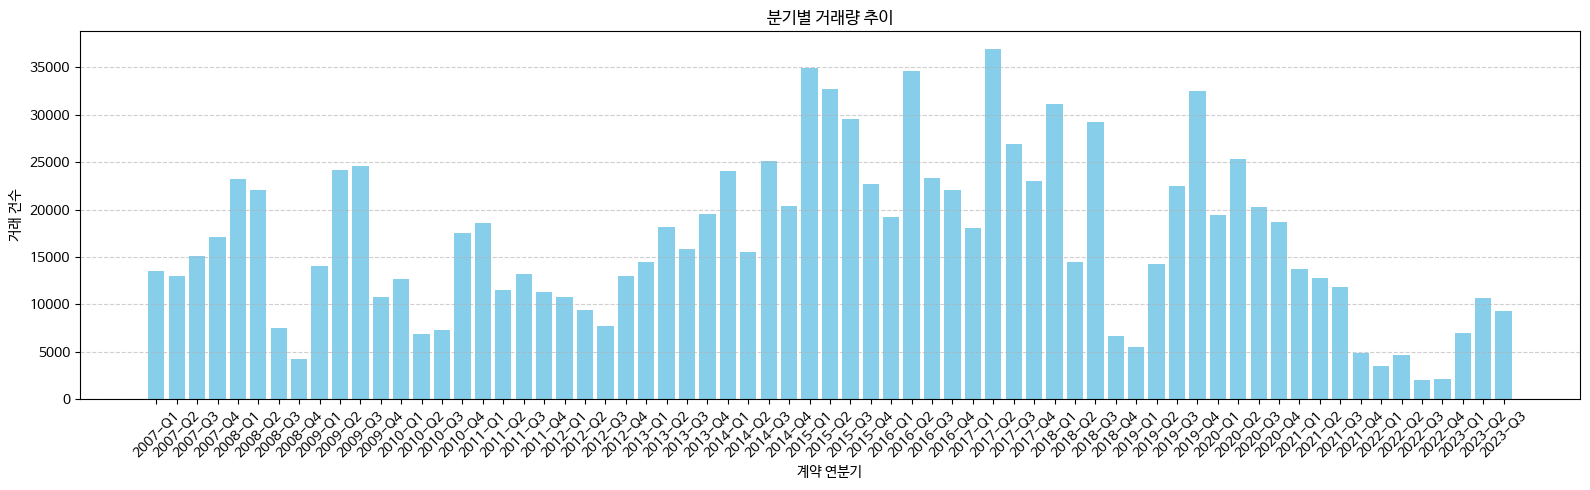

In [216]:
# 중복 제거 및 정렬
quarter_plot = (
    concat[['계약년분기시각화', '분기별거래건수']]
    .drop_duplicates()
    .sort_values('계약년분기시각화')
)

# 시각화
plt.figure(figsize=(16, 5))
plt.bar(quarter_plot['계약년분기시각화'], quarter_plot['분기별거래건수'], color='skyblue')

plt.title('분기별 거래량 추이')
plt.xlabel('계약 연분기')
plt.ylabel('거래 건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [187]:
if '계약년분기시각화' in concat.columns:
    del concat['계약년분기시각화']

if '계약년월시각화' in concat.columns:
    del concat['계약년월시각화']

In [188]:
concat.columns

Index(['target', '계약년월', '계약일', '층', '건축년도', '시군구', '번지', '본번', '부번', '아파트명',
       '도로명', '계약년', '계약월', '월별거래건수', '계약분기', '분기별거래건수'],
      dtype='object')